In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
import tweepy
import json
import re
import operator 

from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener


def get_tokens():
   with open('FirstContactWithTensorFlow.txt', 'r') as tf:
    text = tf.read()
    lowers = text.lower()
    #tokens = nltk.word_tokenize(text)
    puntuacióntext_no_punctuation = lowers.translate(str.maketrans('','',string.punctuation))

    #lowers = text.lower()
    #no_punctuation = lowers.translate(None, string.punctuation)
    tokens = nltk.word_tokenize(puntuacióntext_no_punctuation)
    return tokens


##### Task 2.6 ######

tokens = get_tokens()
#count = Counter(tokens)
#print(count)
filtered = [w for w in tokens if not w in stopwords.words('english')]
count = Counter(filtered)
print(len(count))


###### Task 2.7 #######

# Nos conectamos con la API de tweepy
consumer_key = 'X5EqKwcj2QSpcSlsqoBi29eCb'
consumer_secret = '6i9NqIFCGOrhZzUTlRe8lPTzevyEj8eA8lm8eWwF9MMrabHanq'
access_token = '982692299648925696-MlIqFRw5K8vNOmoGWD4bMoX0dpGo98n'
access_secret = 'at2hhW8W6wGz3mmgxJPCJSnu0UC6wku4l9iJ4U5CzxTdI'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret) 
api = tweepy.API(auth)
user = api.me()

print('Name: ' + user.name)
print('Location: ' + user.location)
print('Friends: ' + str(user.followers_count))
print('Created: ' + str(user.created_at))
print('Description: ' + str(user.description))

##### Task 2.9 #####
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE) 

def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2994
Name: Jonathan Zarama
Location: 
Friends: 4
Created: 2018-04-07 18:51:16
Description: 


In [17]:
# Ejemplo de tokenisation
tweet = 'RT @JordiTorresBCN: just an example! :D http://JordiTorres.Barcelona #masterMEI'
print(preprocess(tweet))

['RT', '@JordiTorresBCN', ':', 'just', 'an', 'example', '!', ':D', 'http://JordiTorres.Barcelona', '#masterMEI']


In [9]:
##### Task 2.10 ########

class TweeterListener(StreamListener):
    
    def on_data(self, data):
        try:
            with open('ColombiaChileTweets.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
    
twitter_stream = Stream(auth, TweeterListener())
twitter_stream.filter(track=['Chile Colombia'])





KeyboardInterrupt: 

In [10]:
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT','…']

fname = 'ColombiaChileTweets.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        count_all.update(terms_stop)
    for word, index in count_all.most_common(10):
        print ('%s : %s'%(word, index))
    print ('\n')

with open(fname, 'r') as f:
    count_all_2 = Counter()
    for line in f:
        tweet2 = json.loads(line)
        # Create a list with all the terms
        terms_hash = [term for term in preprocess(tweet2['text']) if term.startswith('#')]
        count_all_2.update(terms_hash)
    for word, index in count_all_2.most_common(10):
        print ('%s : %s'%(word, index))
    print ('\n')

with open(fname, 'r') as f:
    count_all_3 = Counter()
    for line in f:
        tweet3 = json.loads(line)
        # Create a list with all the terms
        terms_only = [term for term in preprocess(tweet3['text']) 
              if term not in stop and not term.startswith(('#', '@'))] 
        count_all_3.update(terms_only)
    for word, index in count_all_3.most_common(10):
        print ('%s : %s'%(word, index))
    
        

Argentina : 13
Chile : 13
Colombia : 11
México : 8
Costa : 8
Ecuador : 8
El : 7
Bolivia : 7
Guatemala : 7
Brasil : 7


#IVoteBTSBBMAs : 2
#chile : 1
#munmunmundial : 1
#Chichichilele : 1


Argentina : 13
Chile : 13
Colombia : 11
México : 8
Ecuador : 8
Costa : 8
Bolivia : 7
Salvador : 7
El : 7
Guatemala : 7


In [4]:
fname = 'ColombiaChileTweets.json'
with open(fname, 'r') as f:
   count_all = Counter()
   for line in f:
       tweet = json.loads(line)
       # Create a list with all the terms
       terms_all = [term for term in preprocess(tweet['text'])]
       # Update the counter
       count_all.update(terms_all)
   print(count_all.most_common(10))

[('.', 66), ('RT', 27), (':', 25), ('…', 19), ('Mexico', 14), ('Korea', 13), ('AM', 12), ('Brazil', 12), ('Argentina', 12), ('S', 12)]


In [6]:
with open('ColombiaChileTweets.json', 'r') as f:
    import io
    f=io.open('data/stream_barcelona.json', 'r', encoding='utf8' )
    for line in f:
        tweet = json.loads(line)
        tokens = preprocess(tweet['text'])
        print(tokens)

['RT', '@taxi_Tomasa', ':', 'muchas', 'aplicaciones', 'diruptivas', ',', 'utlizan', 'la', 'palabra', 'taxi', ',', 'para', 'promocionarsen', 'sin', 'serlo', ',', 'el', 'Taxi', 'tiene', 'un', 'taximetro', 'y', 'esta', '…']
['RT', '@donyarous', ':', 'Un', 'estudi', 'de', '@lasaboga', 'conclou', 'que', 'a', "l'Hospitalet", 'creix', 'l', "'", 'ús', 'de', 'la', 'bici', 'i', 'que', "s'utilitza", 'el', 'casc', 'el', 'doble', 'que', 'a', 'Barcelona', ',', 'e', '…']
['RT', '@GaliciaBilingue', ':', 'Manifestaci', 'ón', 'de', 'Hablamos', 'Espa', 'ñol', '.', 'Si', 'crees', 'en', 'la', 'libertad', ',', 'si', 'crees', 'que', 'se', 'debe', 'poder', 'estudiar', 'en', 'espa', 'ñol', 'en', 'cualquie', '…']
['RT', '@GanaFalcon', ':', '"', 'Quiz', 'ás', 'por', 'primera', 'vez', 'en', 'su', 'historia', ',', 'los', 'opositores', 'venezolanos', 'ser', 'án', 'llamados', 'a', 'votar', 'no', 'con', 'el', 'coraz', 'ón', ',', 'sino', 'con', 'la', 'me', '…']
['RT', '@Pablo_Iglesias_', ':', 'Valtonyc', 'cant', 'ó', 

In [18]:
##### Task 2.11 #####

with open('ColombiaChileTweets.json','r') as json_file:
         for line in json_file:
             tweet = json.loads(line)
             print(tweet["text"])

with open('ColombiaChileTweets.json', 'r') as f:
    line = f.readline() 
    tweet = json.loads(line) 
    print(json.dumps(tweet, indent=4)) 

RT @btsvotingteam: 🌎 Top countries tweeting #IVoteBTSBBMAs 

⏰ 9AM~10AM KST

1. Brazil
2. US
3. Mexico
4. Indonesia
5. S.Korea
6. Argentina…
RT @lider_mon: LEVANTEN LA MANO CON UN RT LAS DE: 

México
Argentina
Chile
Colombia
Brasil
Peru
España
Canadá
Uruguay
Venezuela
Ecuador
Hon…
RT @iJimkook: Si  tu país esta aquí 

Colombia 
Paraguay 
Guatemala 
México
Ecuador 
Chile 
Brasil 
Bolivia 
Argentina 
El Salvador 
Costa…
RT @estaetics: RT IF YOU SEE YOUR COUNTRY!

Brazil

US

Mexico

Indonesia

S.Korea

Argentina

Philippines

Peru

Colombia

Thailand

Chile…
RT @_StobItJin_: México 
Puerto Rico 
Belice 
Costa Rica 
El Salvador 
Guatemala 
Honduras 
Nicaragua
Panamá 
Argentina
Bolivia 
Chile
Colo…
RT @cyphxr_twt: Argentina
 Bolivia
 Brasil
 Chile
Colombia,
 Costa Rica
Cuba
Ecuador
Guatemala
Honduras
México
Nicaragua
Panamá
Paraguay
 P…
RT @estaetics: RT IF YOU SEE YOUR COUNTRY!

Brazil

US

Mexico

Indonesia

S.Korea

Argentina

Philippines

Peru

Colombia

Thailand

Chile…
RT @Tito_Leiva

In [13]:
#### Case of Study ####

fname = 'ColombiaChileTweets.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_hash = [term for term in preprocess(tweet['text']) if term not in stop]        
        count_all.update(terms_hash)
# Print the first 15 most frequent words
print(count_all.most_common(15))

[('Argentina', 13), ('Chile', 13), ('Colombia', 11), ('México', 8), ('Costa', 8), ('Ecuador', 8), ('El', 7), ('Bolivia', 7), ('Guatemala', 7), ('Brasil', 7), ('Salvador', 7), ('Paraguay', 6), ('Mexico', 6), ('país', 6), ('í', 5)]


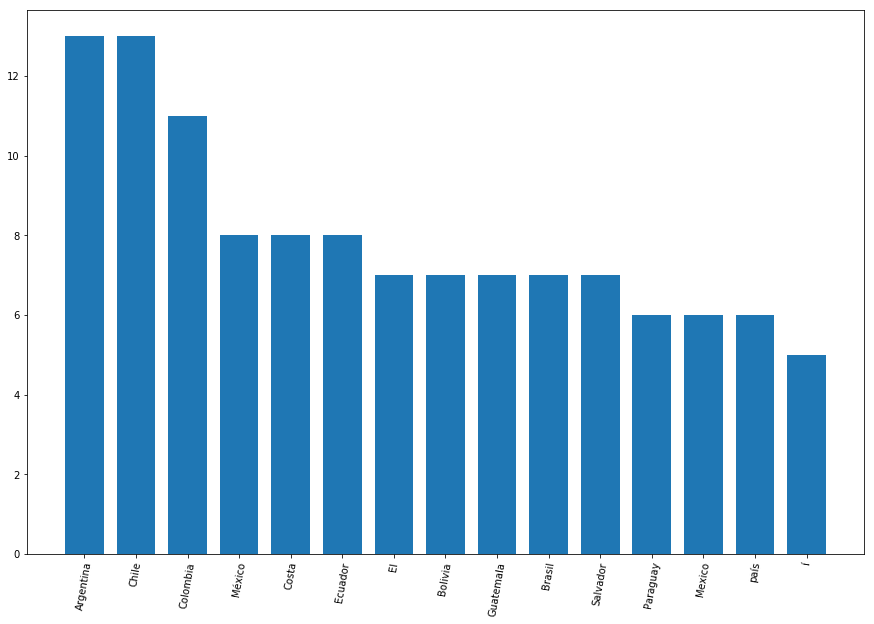

In [14]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)
import matplotlib.pyplot as plt

sorted_x, sorted_y = zip(*count_all.most_common(15))
#print(sorted_x, sorted_y)

plt.bar(range(len(sorted_x)), sorted_y, width=0.75, align='center');
plt.xticks(range(len(sorted_x)), sorted_x, rotation=80);
plt.axis('tight'); 